<a href="https://colab.research.google.com/github/Anirudh-020505/Solar-Energy-Forecasting/blob/main/solarForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# import pandas as pd

# # 1. Mount the Drive (Follow the popup instructions)
# drive.mount('/content/drive')

# # 2. Define the path (Since they added a shortcut, the path is the same for everyone!)
# # Note: Ensure the folder name in My Drive is exactly 'Solar_Project_Data'
# path = '/content/drive/My Drive/Solar-ForeCast-Resource/'

# # 3. Load the Data
# gen_df = pd.read_csv(path + 'spg.csv')

# print("Data Loaded Successfully!")
# print(gen_df.head())

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stucom/solar-energy-power-generation-dataset")

print("Path to dataset files:", path)

100%|██████████| 201k/201k [00:00<00:00, 36.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/stucom/solar-energy-power-generation-dataset/versions/1


In [5]:
import os
import pandas as pd
import numpy as np

print(os.listdir(path))   # shows files

df = pd.read_csv(path + "/spg.csv")   # correct file name
df.head()


['spg.csv']


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [6]:
df = df.drop_duplicates()
df.columns = df.columns.str.lower().str.strip()

In [7]:
if "wind_direction_10_m_above_gnd" in df.columns:
    df["wind_dir_10_sin"] = np.sin(np.deg2rad(df["wind_direction_10_m_above_gnd"]))
    df["wind_dir_10_cos"] = np.cos(np.deg2rad(df["wind_direction_10_m_above_gnd"]))
    df = df.drop("wind_direction_10_m_above_gnd", axis=1)

In [8]:
numeric_cols = df.select_dtypes(include=np.number).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
          (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
df = df.ffill()

In [10]:
X = df.drop("generated_power_kw", axis=1)
y = df["generated_power_kw"]

print("Cleaned Shape:", df.shape)
print(df.head())

Cleaned Shape: (2362, 22)
   temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_msl  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                   

In [20]:
 df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_msl,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw,wind_dir_10_sin,wind_dir_10_cos
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095,-0.734796,6.782879e-01
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940,-0.907924,4.191352e-01
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930,-1.000000,-1.836970e-16
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920,-0.600001,7.999989e-01
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340,0.173820,9.847774e-01


In [14]:
dataset=df

In [15]:
dataset.columns=df.features_name

AttributeError: 'DataFrame' object has no attribute 'features_name'

In [24]:
#features
X = df.drop(columns=["generated_power_kw"])
#target
y=df["generated_power_kw"]


In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42);

In [27]:
X_train

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_msl,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,wind_dir_10_sin,wind_dir_10_cos
3967,15.88,41,1028.6,0.0,0.0,0.0,0,0,0,316.84,...,9.29,35.54,8.79,34.99,8.28,50.919701,77.902954,225.765440,5.263623e-01,0.850260
3177,23.57,24,1016.2,0.0,0.0,0.0,0,0,0,690.64,...,15.79,294.23,14.33,295.28,18.72,11.708596,41.198234,164.229900,-8.898149e-01,0.456322
3886,10.77,67,1019.4,0.0,0.0,10.0,10,0,10,457.46,...,24.54,22.43,22.13,21.97,28.80,26.573571,64.904777,201.679830,3.546174e-01,0.935011
1049,18.00,29,1023.6,0.0,0.0,3.0,0,3,0,752.94,...,35.14,136.66,31.07,136.88,41.04,18.359366,33.638888,157.970070,6.952858e-01,-0.718733
3136,5.18,91,1020.7,0.0,0.0,0.0,0,0,0,0.00,...,2.62,344.05,8.89,238.24,7.92,85.640699,85.180393,91.357450,-8.654139e-01,-0.501058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,30.55,17,1017.4,0.0,0.0,3.0,0,3,0,462.80,...,5.35,312.27,5.09,315.00,8.64,78.352977,72.179076,271.203900,-7.071068e-01,0.707107
2127,31.91,17,1013.5,0.0,0.0,0.0,0,0,0,904.24,...,29.48,208.44,27.06,208.61,38.88,41.720346,32.109021,246.412620,-4.685467e-01,-0.883439
2168,26.06,44,1017.7,0.0,0.0,0.6,2,0,0,718.23,...,30.41,173.88,27.51,173.99,32.76,38.809905,29.573796,118.709850,1.190972e-01,-0.992883
2356,17.78,69,1015.7,0.0,0.0,0.0,0,0,0,0.00,...,2.62,164.05,10.80,180.00,4.32,104.016860,85.584691,65.121769,1.224647e-16,-1.000000


In [28]:
y_train

,generated_power_kw
3967,32.888668
3177,2661.745500
3886,390.276020
1049,2618.729400
3136,539.612670
...,...
2787,101.515110
2127,1823.887400
2168,2385.690600
2356,114.573610


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [39]:
mse,rmse,r2

(177559.95326969083, np.float64(421.3786340925354), 0.8089035198895296)

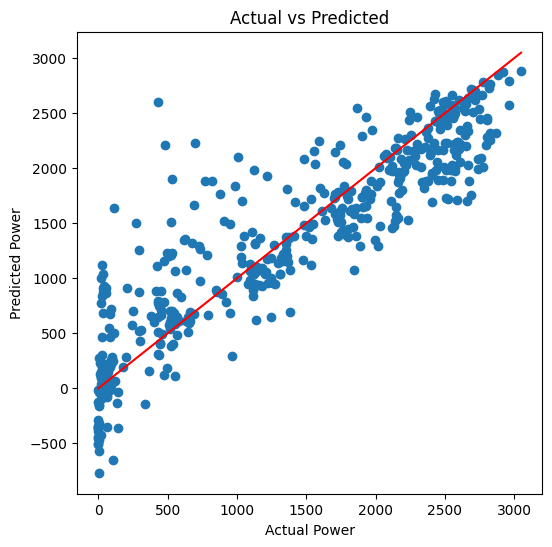

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.title("Actual vs Predicted")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.show()